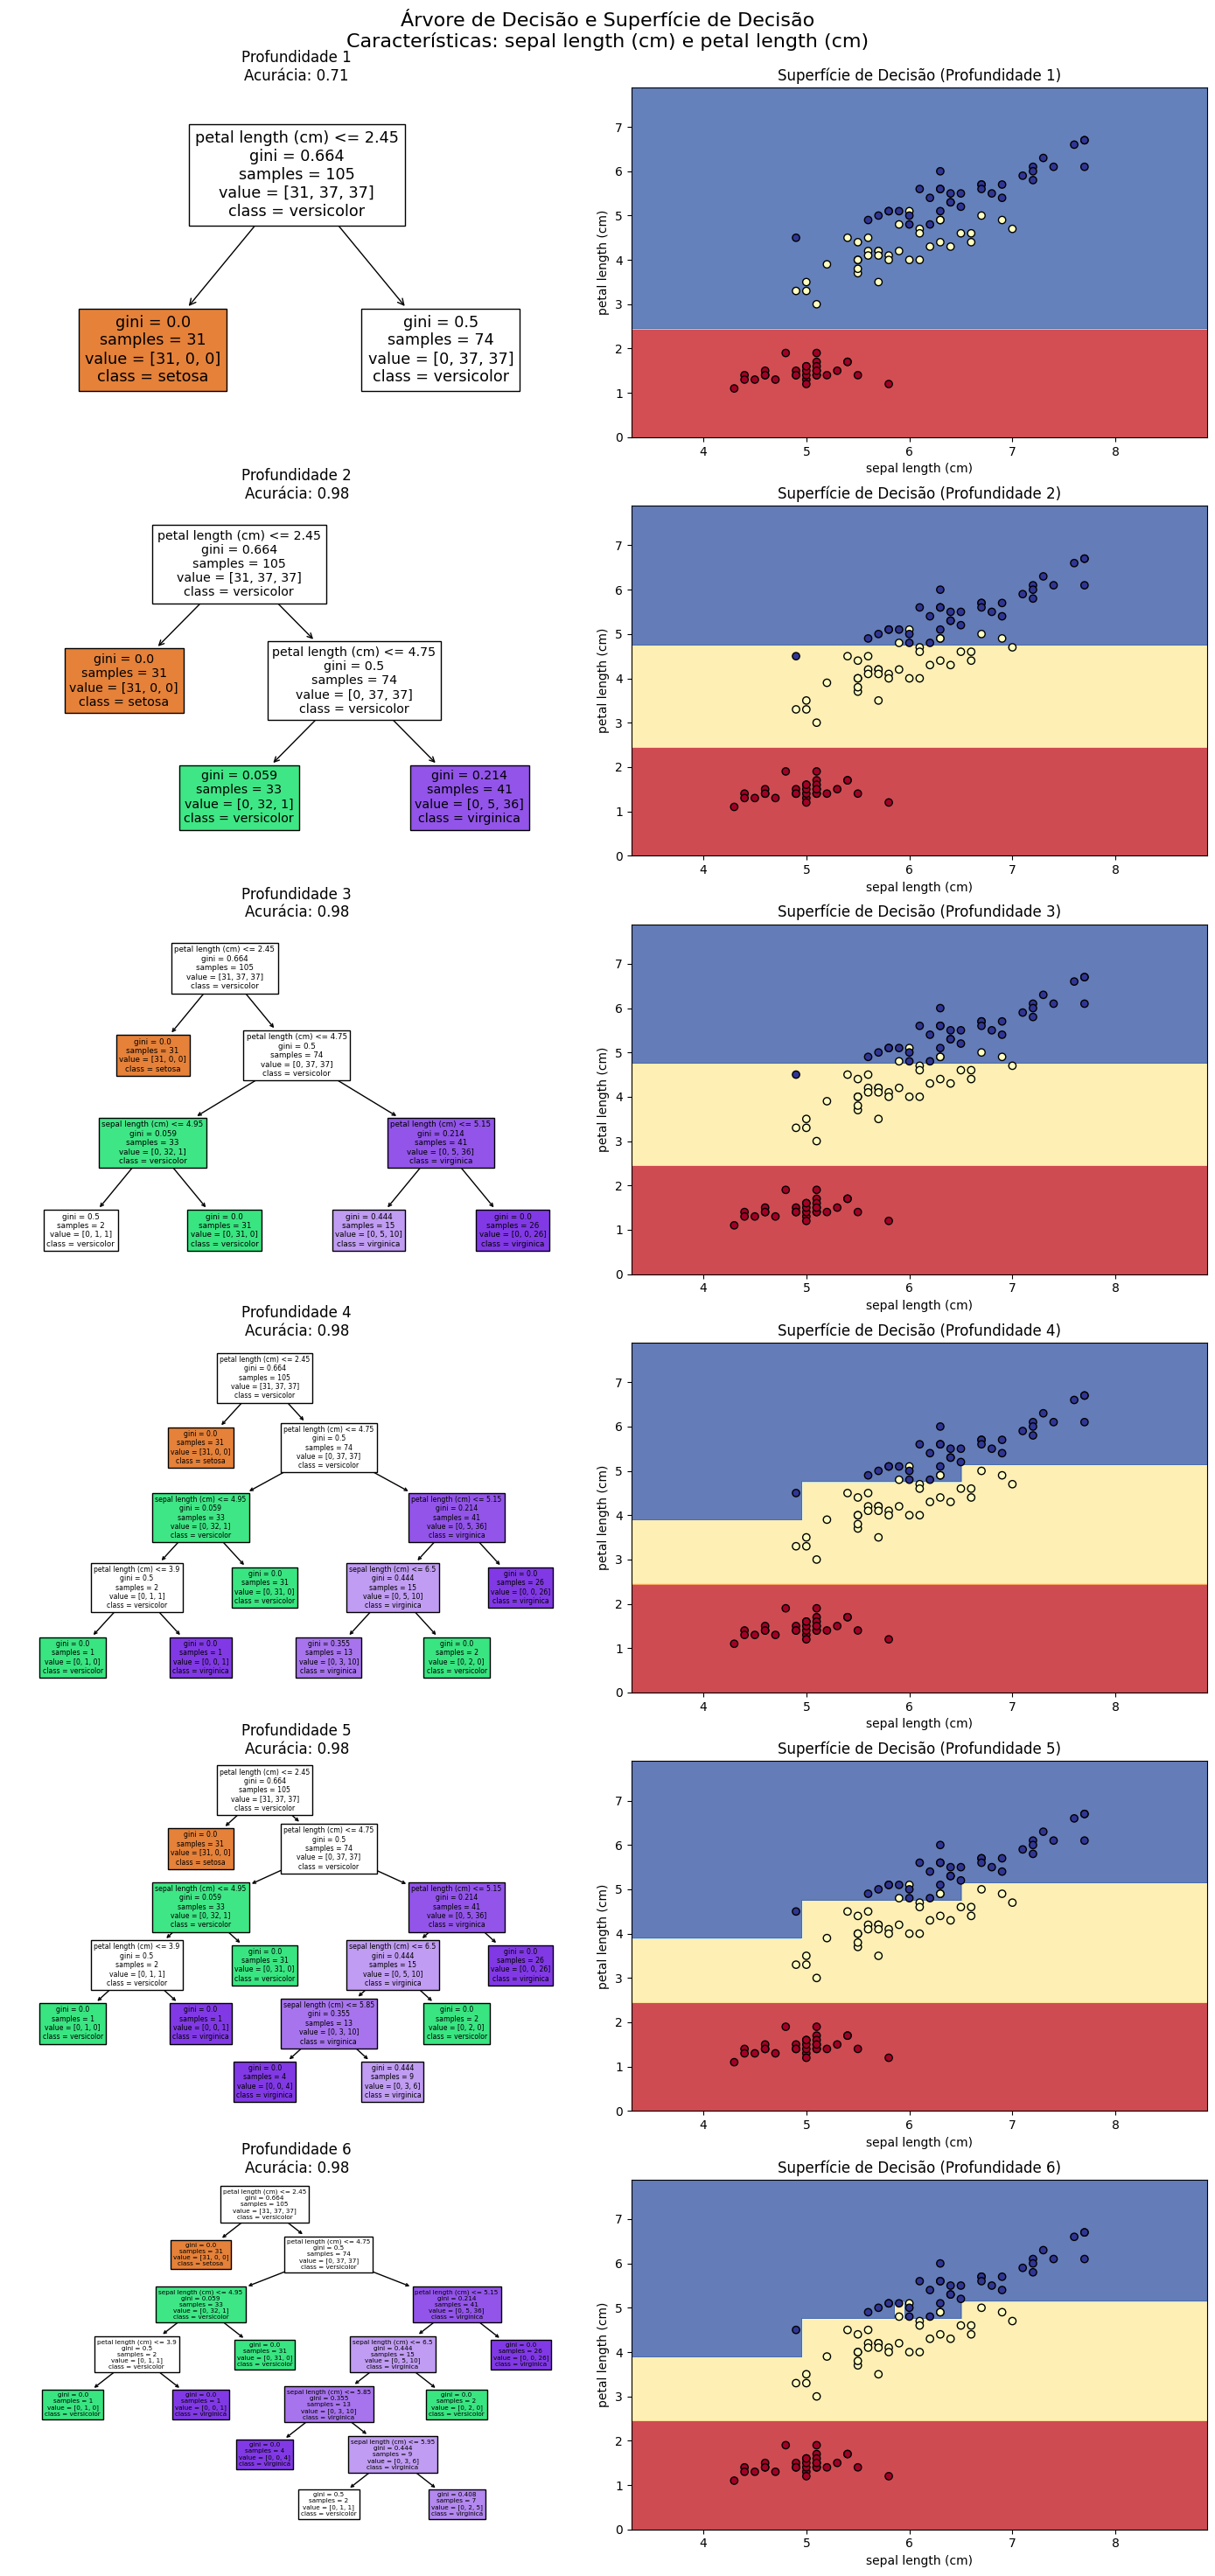

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Carregando o conjunto de dados Iris
iris = load_iris()
selected_features = [0, 2]  # Índices das características selecionadas
X = iris.data[:, selected_features]  # Selecionando características para visualização
y = iris.target

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo as profundidades desejadas
depths = range(1, 7)

# Criação de um meshgrid para a visualização da superfície de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Criando uma grade de subplots para as profundidades desejadas
num_rows = len(depths)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

for i, depth in enumerate(depths):
    # Treinando o modelo com a profundidade atual
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Calculando a acurácia no conjunto de teste
    accuracy = clf.score(X_test, y_test)

    # Plot da árvore de decisão
    plot_tree(clf, filled=True, feature_names=[iris.feature_names[i] for i in selected_features], class_names=iris.target_names, ax=axes[i, 0])
    axes[i, 0].set_title(f'Profundidade {depth}\nAcurácia: {accuracy:.2f}')

    # Previsão da superfície de decisão
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot da superfície de decisão
    axes[i, 1].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    axes[i, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
    axes[i, 1].set_xlabel(iris.feature_names[selected_features[0]])
    axes[i, 1].set_ylabel(iris.feature_names[selected_features[1]])
    axes[i, 1].set_title(f'Superfície de Decisão (Profundidade {depth})')

# Ajustando o layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Ajusta o espaço superior para o título geral
plt.suptitle(f'Árvore de Decisão e Superfície de Decisão\nCaracterísticas: {iris.feature_names[selected_features[0]]} e {iris.feature_names[selected_features[1]]}', fontsize=16)

# Exibindo a figura com as subplots
plt.show()
